In [3]:
% matplotlib inline
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [108]:
data = np.loadtxt('HadCRUT4_month.txt', usecols=1)

In [47]:
len(data)/12

168.33333333333334

In [65]:
n=168
m=7
p=24

In [74]:
data_jan = [data[e*12] for e in range(0,n)]
data_jan_temp=np.zeros([m,p])
data_jan_mean = np.zeros(m)
data_jan_detrend_part = np.zeros([m,p])
data_jan_detrend = np.zeros(n)

for j in range(0,m):
    data_jan_temp[j]=[data_jan[i+j*24] for i in range(0,p)]
    data_jan_mean[j]=np.mean(data_jan_temp)
    data_jan_detrend_part[j] = data_jan_temp[j]-data_jan_mean[j]

lis=[data_jan_detrend_part[j] for j in range(0,m)]
data_jan_detrend=np.concatenate(lis)

In [59]:
t=[1850+j for j in range(0,n)]

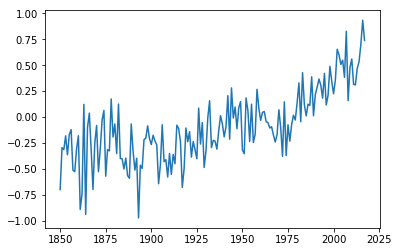

In [60]:
plt.plot(t,data_jan)

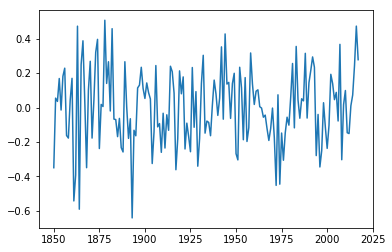

In [61]:
plt.plot(t,data_jan_detrend)

In [138]:
p=40
data_m = np.zeros([12,n])
data_m_temp=np.zeros([12,n-p,p])
data_m_mean = np.zeros([12,n-p])
data_m_detrend_part = np.zeros([12,n-p,p])
psi_m=np.zeros([12,n-p])
for k in range(0,12):
    data_m[k] = [data[e*12+k] for e in range(0,n)]
    for j in range(0,n-p):
        data_m_temp[k][j]=[data_m[k][i+j] for i in range(0,p)]
        data_m_mean[k][j]=np.mean(data_m_temp[k][j])
        data_m_detrend_part[k][j] = data_m_temp[k][j]-data_m_mean[k][j]
        temp=np.std(data_m_detrend_part[k][j])
        psi_m[k][j]=temp

In [154]:
psi_m.shape

(12, 128)

In [168]:
psi_array=np.zeros(1536)
for j in range(0,12):
    for i in range(0,128):
        psi_array[12*i+j] = psi_m[j][i]

In [169]:
psi_final = np.mean(psi_array)
psi_final

0.17282151642158805

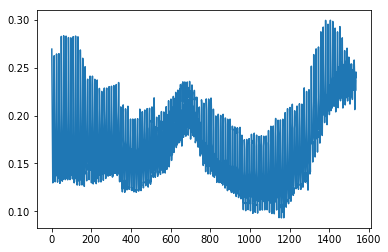

In [171]:
t=np.linspace(1,1536,1536)
plt.plot(t,psi_array)